# 项目：TMDb电影数据

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介
这是一份电影数据表，包含了大量电影的介绍、导演及演员、流行度、评分、票房等信息。
在这份报告中我尝试探索以下几个问题：
1. 2015年最受欢迎的电影类别是哪些？
2. 票房高的电影有哪些特点？

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
# 务必包含一个‘咒语’，以便将你的视图
#   与 notebook 保持一致。关于更多信息，请访问这个网页：
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

<a id='wrangling'></a>
## 数据整理

### 常规属性

加载数据表

In [3]:
# 需要处理的数据文件：tmdb-movies.csv
# 加载数据并打印几行。进行几项操作，检查数据
#   类型，以及是否有缺失数据或错误数据。
df = pd.read_csv("tmdb-movies.csv")
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


### 查看数据结构

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### 清理重复的数据

In [5]:
sum(df.duplicated())

1

In [6]:
df.drop_duplicates(inplace=True)
df.shape

(10865, 21)

### 去除数据异常且进行数据分析时不会使用到的列

In [7]:
df.drop("homepage", axis=1, inplace=True)
df.drop("tagline", axis=1, inplace=True)
df.drop("keywords", axis=1, inplace=True)
df.drop("production_companies", axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 17 columns):
id                10865 non-null int64
imdb_id           10855 non-null object
popularity        10865 non-null float64
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
cast              10789 non-null object
director          10821 non-null object
overview          10861 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
release_date      10865 non-null object
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: float64(4), int64(6), object(7)
memory usage: 1.5+ MB


### 去除缺失种类特性的电影数据

In [9]:
df_genres = df.iloc[:, 10:11]
nan_genres_index = df_genres[df_genres.isnull().values==True].index
df_genres = df.drop(nan_genres_index)

In [10]:
df_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 17 columns):
id                10842 non-null int64
imdb_id           10834 non-null object
popularity        10842 non-null float64
budget            10842 non-null int64
revenue           10842 non-null int64
original_title    10842 non-null object
cast              10767 non-null object
director          10800 non-null object
overview          10839 non-null object
runtime           10842 non-null int64
genres            10842 non-null object
release_date      10842 non-null object
vote_count        10842 non-null int64
vote_average      10842 non-null float64
release_year      10842 non-null int64
budget_adj        10842 non-null float64
revenue_adj       10842 non-null float64
dtypes: float64(4), int64(6), object(7)
memory usage: 1.5+ MB


> **提示**：_不应_在每个框中进行太多操作。可以自由创建框，进行数据探索。在这个项目中，可以在初始 notebook 中进行大量探索操作。不要求对其进行组织，但务必仔细阅读备注，理解每个代码框的用途。完成分析之后，可以创建 notebook 副本，在其中去除多余数据，组织步骤，从而形成结构连贯、紧密的报告。

> **提示**：务必向你的读者告知你在调查中采取的步骤。在每个代码框或每组相关代码框后面，用 markdown 框对前面的框中的调查结果向读者进行说明。尽量做到这一点，以便读者理解后续框中的内容。

<a id='eda'></a>
## 探索性数据分析

> **提示**：整理和清理数据之后，现在可以进行探索。计算统计值，创建视图，解决你在简介段提出的研究问题。建议采用系统化方法。一次探索一个变量，然后探索变量之间的关系。

### 找出2015年最受欢迎的电影类别

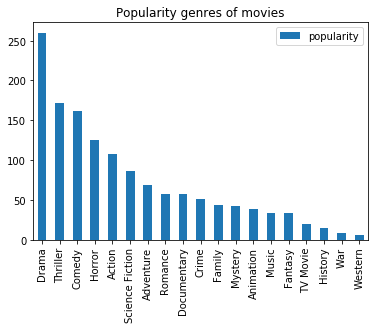

In [25]:
df_2015 = df_genres.query("release_year=='2015'").sort_values("popularity", ascending=False)
genres = []
df_2015["genres"].apply(lambda x: [genres.append(g) for g in x.split("|")])
pd.Series(genres).value_counts().plot(kind="bar", title="Popularity genres of movies", legend=True, label="popularity");

2015年最受欢迎的电影类别前三名是：Drama、Thriller、Comedy

### 评分高的电影是否票房高？

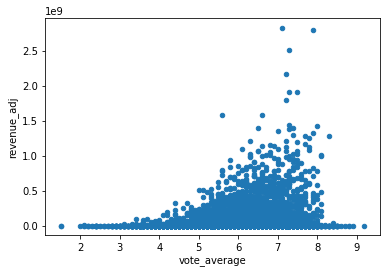

In [41]:
# 继续探索数据，解决你的附加研究问题。
#   如果有其它问题要调查，
#   请根据需要添加更多标题。
df.iloc[:, np.r_[13,16]].plot(kind="scatter", x="vote_average", y="revenue_adj")

通常评分高的电影票房比较高

### 流行度高的电影是否票房高？

先去掉票房为0的电影数据：

In [37]:
df_revenue = df.iloc[:, np.r_[2, 16]]
zero_revenue_index = df_revenue[df_revenue["revenue_adj"]==0].index
df_revenue = df.drop(zero_revenue_index)

先观察流行度与票房关系集中的部份，发现其中的趋势

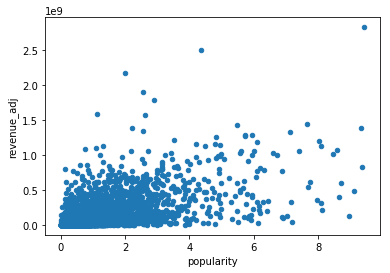

In [38]:
df_revenue.query("popularity<10").plot(kind="scatter", x="popularity", y="revenue_adj")

再观察整体情况

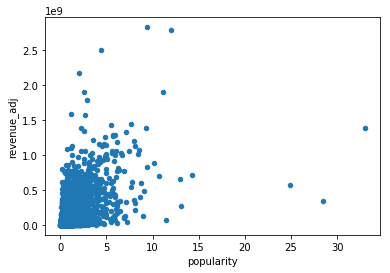

In [42]:
df_revenue.plot(kind="scatter", x="popularity", y="revenue_adj")

电影票房大体与流行程序成正相关关系，通常流行度高的电影票房都比较高，但是也有少数例外：少数流行度低的电影票房也比较高、少数流行度高的电影票房也不高。

### 高票房电影的预算是否更高？

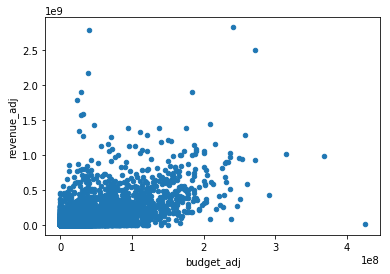

In [25]:
df.iloc[:, np.r_[15, 16]].plot(kind="scatter", x="budget_adj", y="revenue_adj")
#df_agg.groupby("director").agg({"revenue_adj":sum}).sort_values("revenue_adj",ascending=False)

电影的预算不是高票房的决定因素，也有低成本预算的电影获得了高票房

<a id='conclusions'></a>
## 结论
1. 2015年度最受欢迎的电影类别前三名是：Drama、Thriller、Comedy
2. 高票房的电影评分通常都比较高。电影票房大体与流行度成正相关关系，通常流行度高的电影票房都比较高，但是也有少数例外：少数流行度低的电影票房也比较高、少数流行度高的电影票房也不高。
3. 因数据较少，且大量电影数据的票房数据为0，此次分析仅能代表这份数据表的调查结果，不能说明真实的电影票房情况。

> **提示**：最后，总结你的调查结果。确保了解探索结果的限制。如果尚未进行任何统计检验，不要做出任何统计结论。切记不要根据相互关系推导出因果关系！

> **提示**：如果对报告满意，应将其副本保存为 HTML 或 PDF 形式。导出报告之前请检查一遍，确保报告流程完整。应删除所有类似的“提示”引用段，以保持报告简洁。还需要查看课程结尾的项目提交页的项目审阅规范。

> 如需将报告导出到工作区，应运行下面的代码框。如果正确，会返回代码 0，工作区目录下会生成 .html 文件（单击左上角的 jupyter 图标）。也可以通过 **文件** > **下载为** 子菜单下载 html 报告，然后手动上传到工作区目录。完成之后，可以单击右下角的“提交项目”，提交你的项目。恭喜！

## 参考
- 处理缺失值1：[http://blog.csdn.net/u012387178/article/details/52571725](http://blog.csdn.net/u012387178/article/details/52571725)
- 处理缺失值2：[http://blog.csdn.net/lxb1022/article/details/76977550](http://blog.csdn.net/lxb1022/article/details/76977550)
- 统计结果排序：[https://stackoverflow.com/questions/27842613/pandas-groupby-sort-within-groups](https://stackoverflow.com/questions/27842613/pandas-groupby-sort-within-groups)

In [26]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset-zh.ipynb'])

0